- Stacking RNN over each other 

In [1]:
import torch 
from torch import nn 
from d2l import torch as d2l

In [2]:
class StackedRNNScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, num_layers, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.rnns = nn.Sequential(
            *[
                d2l.RNNScratch(
                    num_inputs if i == 0 else num_hiddens, num_hiddens, sigma
                )
                for i in range(num_layers)
            ]
        )

In [3]:
@d2l.add_to_class(StackedRNNScratch)
def forward(self, inputs, Hs=None):
    outputs = inputs
    if Hs is None:
        Hs = [None] * self.num_layers
    for i in range(self.num_layers):
        outputs, Hs[i] = self.rnns[i](outputs, Hs[i])
        outputs = torch.stack(outputs, 0)
    return outputs, Hs

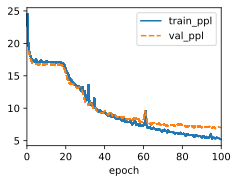

In [4]:
data = d2l.TimeMachine(batch_size=1024, num_steps=32)
rnn_block = StackedRNNScratch(num_inputs=len(data.vocab),
num_hiddens=32, num_layers=2)
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [18]:
model.predict('machine is', 200, data.vocab, d2l.try_gpu())

'machine is and the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the t'

- Concise implementation

We can just take any basic RNN and optionally make it deep

In [12]:
class GRU(d2l.RNN):  # @save
    """The multilayer GRU model."""
    def __init__(self, num_inputs, num_hiddens, num_layers, dropout=0):
        d2l.Module.__init__(self)
        self.save_hyperparameters()
        self.rnn = nn.GRU(num_inputs, num_hiddens, num_layers, dropout=dropout)

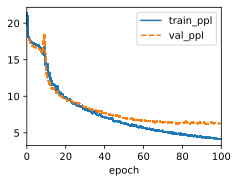

In [13]:
gru = GRU(num_inputs=len(data.vocab), num_hiddens=32, num_layers=2)
model = d2l.RNNLM(gru, vocab_size=len(data.vocab), lr=2)
trainer.fit(model, data)

In [26]:
model.predict('time machine', 500, data.vocab, d2l.try_gpu())

'time machine the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the time traveller the t'